In [1]:
%matplotlib widget
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy

In [2]:
#import mplhep as hep
#plt.style.use(hep.style.ROOT)

In [3]:
fluxloc = "output" # flux file location
inp = "/ub_initial.dat" # file with input flux
out = "/ub_def" # beginning of output fluxes
def outarray(mval,tval,cval): # Function to get string filename
    return fluxloc + out + "_m" +"%.3f"%mval + "_t"+"%.3f"%tval + "_c" + "%.3f"%cval + ".dat"
print(fluxloc+inp)

output/ub_initial.dat


In [4]:
# Load Input Data
inpfile = np.loadtxt(fluxloc+inp)
inp_energy = inpfile[:,0] # input flux energy
inp_flux = inpfile[:,1:] # input flux array [nu_e, anti nu_e, nu_mu, anti nu_mu]

In [75]:
# Parameter values (make sure a file with these outputs actually exists)
mval = 2
tval = 1
cval = 1
prtp = 0 #particle type[0:nu_e, 1:anti nu_e, 2:nu_mu, 3:anti nu_mu]
part_label = ["nu_e","anti nu_e","nu_mu","anti nu_mu"]

In [76]:
# Load Output Data
outfile = np.loadtxt(outarray(mval,tval,cval))
out_flux = outfile[:,1:] # input flux array

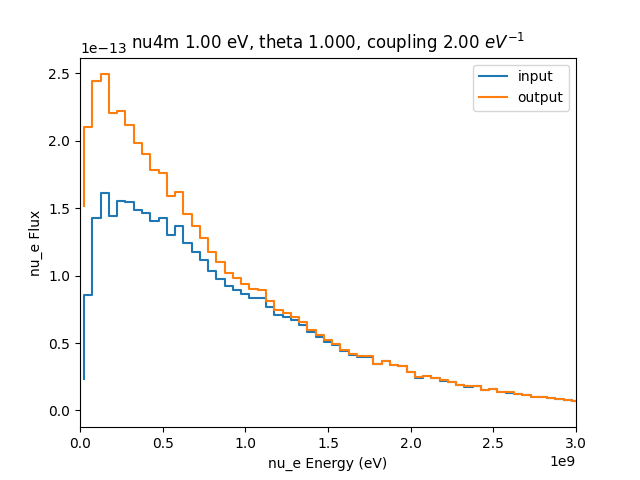

In [77]:
# Comparison Plot
fig, ax = plt.subplots()
ax.plot(inp_energy,inp_flux.T[prtp], label = "input", drawstyle='steps')
ax.plot(inp_energy,out_flux.T[prtp], label = "output", drawstyle='steps')
#ax.plot(inpenergy,SMprob*inpnuflux, label = "SM", drawstyle='steps')
ax.set_xlabel(part_label[prtp]+" Energy (eV)")
ax.set_ylabel(part_label[prtp]+" Flux")
ax.set_title("nu4m %.2f eV, theta %.3f, coupling %.2f $eV^{-1}$"%(mval,tval,cval))

ax.set_xlim(0,3e9)
ax.legend()
#fig.savefig("figures/flux_m%.3f_t%.3f_c%.3f.png"%(mval,tval,cval),dpi=100, bbox_inches="tight")
plt.show()

In [8]:
# Set mass, theta, and tau ranges

mstep = 0.1
mmin = 0
mmax = 5.00
mrange = np.arange(mmin,mmax+mstep,mstep)

tstep = 0.05
tmin = 0.0
tmax = 1.0
trange = np.arange(tmin,tmax+tstep,tstep)

cstep = 0.25
cmin = 0
cmax = 9.5
crange = np.arange(cmin,cmax+cstep,cstep)

In [9]:
# Load flux files
fluxratios = np.zeros((len(mrange),len(trange),len(crange),200,4))
for mi, m in enumerate(mrange):
    for ti, t in enumerate(trange):
        for ci, c in enumerate(crange):
            outflux = np.loadtxt(outarray(m,t,c))
            out_flux = outflux[:,1:]
            if not np.isnan(out_flux).any():
                fluxratios[mi][ti][ci] = out_flux/inp_flux
            else:
                fluxratios[mi][ti][ci] = np.nan

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


In [23]:
# Cutoff high energies
enmax = 130
mod_energy = inp_energy[:enmax]
fluxratiosmod = np.take(fluxratios, range(enmax), axis = 3)
print(len(fluxratiosmod[0][0][0]))
print(mod_energy)

130
[2.500e+07 7.500e+07 1.250e+08 1.750e+08 2.250e+08 2.750e+08 3.250e+08
 3.750e+08 4.250e+08 4.750e+08 5.250e+08 5.750e+08 6.250e+08 6.750e+08
 7.250e+08 7.750e+08 8.250e+08 8.750e+08 9.250e+08 9.750e+08 1.025e+09
 1.075e+09 1.125e+09 1.175e+09 1.225e+09 1.275e+09 1.325e+09 1.375e+09
 1.425e+09 1.475e+09 1.525e+09 1.575e+09 1.625e+09 1.675e+09 1.725e+09
 1.775e+09 1.825e+09 1.875e+09 1.925e+09 1.975e+09 2.025e+09 2.075e+09
 2.125e+09 2.175e+09 2.225e+09 2.275e+09 2.325e+09 2.375e+09 2.425e+09
 2.475e+09 2.525e+09 2.575e+09 2.625e+09 2.675e+09 2.725e+09 2.775e+09
 2.825e+09 2.875e+09 2.925e+09 2.975e+09 3.025e+09 3.075e+09 3.125e+09
 3.175e+09 3.225e+09 3.275e+09 3.325e+09 3.375e+09 3.425e+09 3.475e+09
 3.525e+09 3.575e+09 3.625e+09 3.675e+09 3.725e+09 3.775e+09 3.825e+09
 3.875e+09 3.925e+09 3.975e+09 4.025e+09 4.075e+09 4.125e+09 4.175e+09
 4.225e+09 4.275e+09 4.325e+09 4.375e+09 4.425e+09 4.475e+09 4.525e+09
 4.575e+09 4.625e+09 4.675e+09 4.725e+09 4.775e+09 4.825e+09 4.875e+09
 4

In [34]:
print(fluxratiosmod[10][10][10])

[[2.86713929e+00 1.04815398e+01 9.62347255e-01 1.07428226e+00]
 [1.50115140e+00 3.58690908e+00 7.63984005e-01 8.07343652e-01]
 [1.26468297e+00 2.70721495e+00 7.05753095e-01 7.82644107e-01]
 [1.20958206e+00 2.16230787e+00 8.50221124e-01 9.58518684e-01]
 [1.21126741e+00 2.09736131e+00 8.22984350e-01 9.32401016e-01]
 [1.17177398e+00 2.05242486e+00 7.01691648e-01 8.02983403e-01]
 [1.15239682e+00 1.71586174e+00 6.20238787e-01 7.05864194e-01]
 [1.13947804e+00 1.65898749e+00 5.88638565e-01 6.58299774e-01]
 [1.12490357e+00 1.44770380e+00 5.88787053e-01 6.50337004e-01]
 [1.11465826e+00 1.40466879e+00 6.05861808e-01 6.60744284e-01]
 [1.09851003e+00 1.27787515e+00 6.30540236e-01 6.79468324e-01]
 [1.09438280e+00 1.32974014e+00 6.57619831e-01 7.02283855e-01]
 [1.07841860e+00 1.24866802e+00 6.84454535e-01 7.23501878e-01]
 [1.07515237e+00 1.20742759e+00 7.09752539e-01 7.42924132e-01]
 [1.06893827e+00 1.16885070e+00 7.33007551e-01 7.62707521e-01]
 [1.06312671e+00 1.13220251e+00 7.54105363e-01 7.794149

In [35]:
with open("fluxratios.npy", 'wb') as f:
    np.save(f, fluxratiosmod.astype("float16"))

In [38]:
with open("fluxratios.npy", 'rb') as f:
    fluxratios = np.load(f).astype("float64")

In [45]:
def plotratio(fluxratios, xaxis, yaxis, indices):
    '''
    Function to plot a single instance given flux ratios, xaxis, yaxis, and indices for other values
    '''
    fluxratios = np.take(fluxratios, indices[4], axis = 4) # Choose a particle type
    T = [0,1,2,3] 
    if xaxis == yaxis: # Can't plot same axis
        print("Choose different variables to plot")
        return 0
    if xaxis>yaxis: # ensure xaxis is smaller for consistancy 
        xaxis, yaxis = yaxis, xaxis
    T.remove(xaxis) 
    T.remove(yaxis) # T is axes to remove
    r1, r2 = T
    fluxratios = np.take(fluxratios, indices[r1], axis = r1) # high dimensional slice out other axes
    fluxratios = np.take(fluxratios, indices[r2], axis = r2-1)
    minrange = (mmin, tmin, cmin, inp_energy[0])
    maxrange = (mmax, tmax, cmax, inp_energy[-1])
    part_label = ["nu_e","anti nu_e","nu_mu","anti nu_mu"]
    labels = ["mass (eV)", "theta_24", "tau ($eV^{-1}$)", "energy (eV)"]
    plt.clf() # clear figure
    extent = minrange[xaxis], maxrange[xaxis], minrange[yaxis], maxrange[yaxis] # range of image
    cmap = copy.copy(mpl.cm.get_cmap("viridis")) 
    cmap.set_bad(color='k') # set color of nan to black
    im = plt.imshow(fluxratios.T, cmap = cmap, extent = extent, aspect = "auto", origin='lower', vmin = 0.0)
    plt.xlabel(labels[xaxis])
    plt.ylabel(labels[yaxis])
    plt.title(part_label[indices[4]]+" muon neutrino flux ratios")
    cb = plt.colorbar()
    #fig.savefig(f'figures/fluxratio_E{inpenergy[enindex]:.2e}.png',dpi=100, bbox_inches="tight")
    plt.show()

#plotratio(fluxratiosmod, 0, 3, [1, 20, 1, 20, 2])

In [46]:
# set up interactive plots
plt.ion() # interactive mode
fig, ax = plt.subplots()

# Set widgets
@widgets.interact(variable1 = [("mass of sterile (eV)",0), ("theta_24",1), ("coupling; tau (eV^-1)",2), ("energy (eV)",3)],
                  variable2 = [("mass of sterile (eV)",0), ("theta_24",1), ("coupling; tau (eV^-1)",2), ("energy (eV)",3)],
                  mass=widgets.FloatSlider(min=mmin, max=mmax, step=mstep),
                  theta=widgets.FloatSlider(min=tmin, max=tmax, step=tstep),
                  coupling=widgets.FloatSlider(min=cmin, max=cmax, step=cstep),
                  Energy=widgets.IntSlider(min=mod_energy[0], max=mod_energy[-1], step=mod_energy[1]-mod_energy[0]),
                  ptype=[('nu_e',0),('anti_nu_e',1),('nu_mu',2),('anti_nu_mu',3)])
def update(variable1 = 0, variable2 = 2, mass = 1, theta = 1, coupling = 1, Energy = 10,ptype = 2):
    """Remove old lines from plot and plot new one"""
    mindex = np.where(mrange.round(3)==mass)[0][0] # Change from values to index
    tindex = np.where(trange.round(3)==theta)[0][0]
    cindex = np.where(crange.round(3)==coupling)[0][0]
    Eindex = np.where(mod_energy==Energy)[0][0]
    indices = [mindex, tindex, cindex, Eindex, ptype]
    plotratio(fluxratios, variable1, variable2, indices) # Plot figures

interactive(children=(Dropdown(description='variable1', options=(('mass of sterile (eV)', 0), ('theta_24', 1),…

In [13]:
#





















#